<a href="https://colab.research.google.com/github/dphi-official/Machine_Learning_Bootcamp/blob/master/Assignments/Advance_Track/XAI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

# Task 1

## Import Libraries

In [116]:
!pip install shap

In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import shap

## Load the data
Display the first 5 rows of the data after loading.

In [118]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


categorical attributes :sex, cp, fbs, restecg, exang, thal, target <br>
Numerical attributes : age, trestbps, chol, thalach, oldpeak, slope, ca

## Perform Basic Exploratory Data Analysis

<h3>Change categorical attribute type to caterory

In [119]:
heart_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'target']] = heart_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'target']].astype('category')

In [120]:
heart_data.info()
#data type of categorical attributes has been change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       212 non-null    int64   
 1   sex       212 non-null    category
 2   cp        212 non-null    category
 3   trestbps  212 non-null    int64   
 4   chol      212 non-null    int64   
 5   fbs       212 non-null    category
 6   restecg   212 non-null    category
 7   thalach   212 non-null    int64   
 8   exang     212 non-null    category
 9   oldpeak   212 non-null    float64 
 10  slope     212 non-null    int64   
 11  ca        212 non-null    int64   
 12  thal      212 non-null    category
 13  target    212 non-null    category
dtypes: category(7), float64(1), int64(6)
memory usage: 14.0 KB


In [121]:
heart_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'target']].describe()

,sex,cp,fbs,restecg,exang,thal,target
count,212,212,212,212,212,212,212
unique,2,4,2,3,2,4,2
top,1,0,0,1,0,2,1
freq,146,104,177,108,142,108,115


from describe categorical attribute table, we can know how many unique value on attribute, mode, and frequency of mode

In [122]:
heart_data.describe()

,age,trestbps,chol,thalach,oldpeak,slope,ca
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,132.127358,247.830189,148.995283,1.008491,1.448113,0.783019
std,9.493376,17.440700,53.199877,23.332645,1.141681,0.601850,1.066551
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,211.750000,132.000000,0.000000,1.000000,0.000000
50%,57.000000,130.000000,240.500000,151.500000,0.650000,2.000000,0.000000
75%,61.250000,140.000000,277.000000,165.250000,1.600000,2.000000,1.000000
max,77.000000,192.000000,564.000000,202.000000,5.600000,2.000000,4.000000


from describing numerical attribute, we will know about mean, std, min dan max value, and quartile value

<h3>Check Outliers

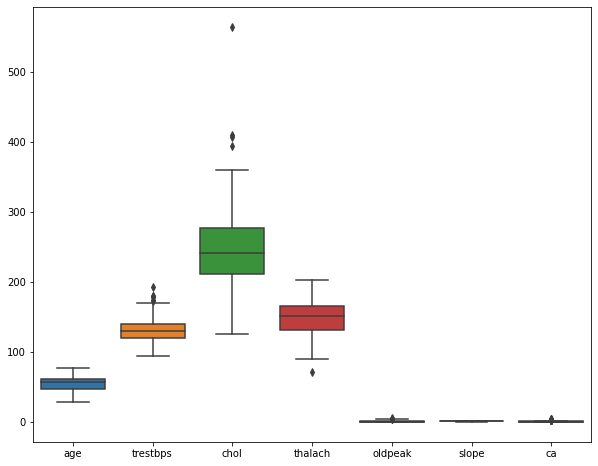

In [123]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']])
plt.show()

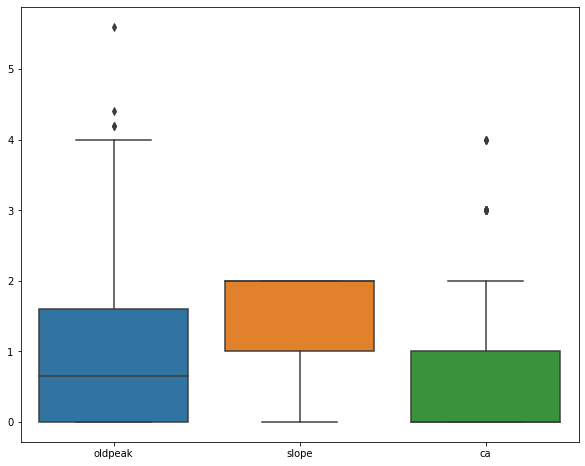

In [124]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=heart_data[['oldpeak', 'slope', 'ca']])
plt.show()

from boxpot, we know that oldpeak, ca, thalach, chol, and trestbps have outliers but not much. I think we can use standardization to numerical attributes if we are using distance based model

<h2>Check Correlation of numerical attributes

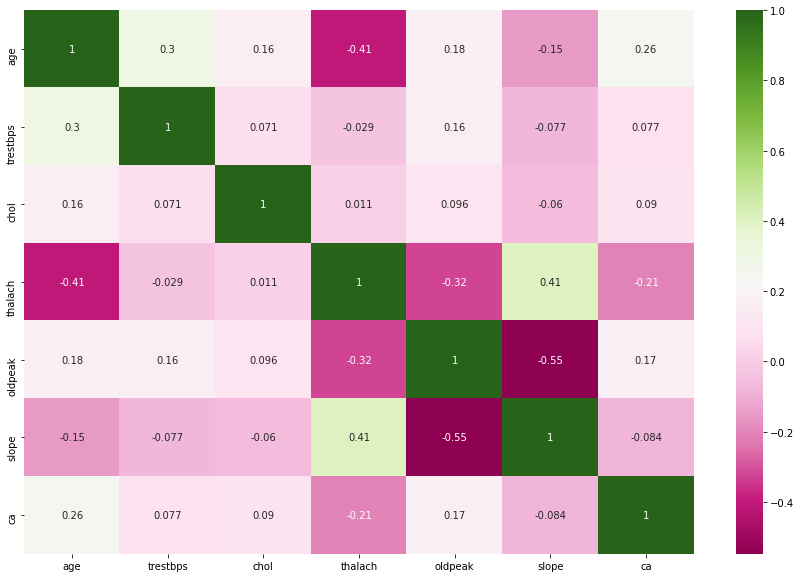

In [125]:
corrmat=heart_data.corr(method='pearson')
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, annot=True, cmap='PiYG')
plt.show()
# there are no attributes that linear correlated with other attributes

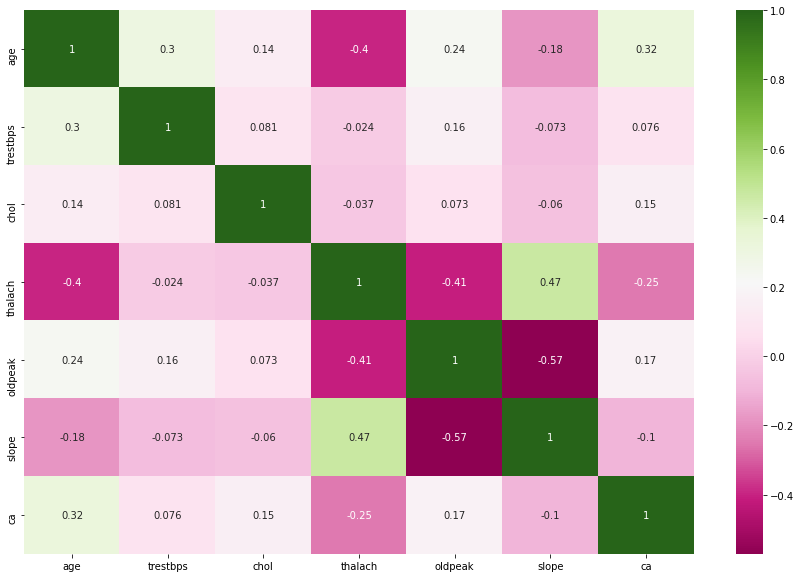

In [126]:
corrmat=heart_data.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, annot=True, cmap='PiYG')
plt.show()
# there are no attributes that non-linear correlated with other attributes

<h2>Check Missing value

In [127]:
heart_data.isnull().sum()
#there is no missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h2>Check Class imbalance

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


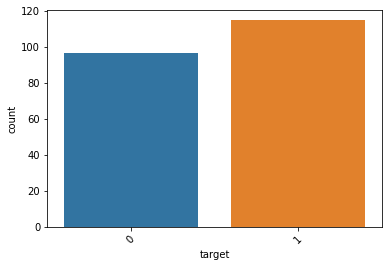

In [128]:
sns.countplot(heart_data['target'])
plt.xticks(rotation=45)
plt.show()
#i think the class is pretty balance

<h3>Change back binary categorical attributes to numerik

In [129]:
heart_data[['sex', 'fbs','exang', 'target']] = heart_data[['sex', 'fbs','exang', 'target']].astype('int')

<h2>Perform one hot encoding for categorical attributes

In [130]:
data = pd.get_dummies(heart_data)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,48,1,124,255,1,175,0,0.0,2,2,1,0,0,1,0,0,1,0,0,0,1,0
1,68,0,120,211,0,115,0,1.5,1,0,1,0,0,1,0,1,0,0,0,0,1,0
2,46,1,120,249,0,144,0,0.8,2,0,0,1,0,0,0,1,0,0,0,0,0,1
3,60,1,130,253,0,144,1,1.4,2,1,0,1,0,0,0,0,1,0,0,0,0,1
4,43,1,115,303,0,181,0,1.2,1,0,1,1,0,0,0,0,1,0,0,0,1,0


## Separate the Input and Target Features of the data

In [131]:
X = data.drop(['target'], axis=1)
y= data['target']

## Scale your data if required

In [132]:
#scaling numerical attributes with standardization
scaler = StandardScaler()

In [133]:
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']] = pd.DataFrame(scaler.fit_transform(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']]), columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca'])

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Task 2

## Build a Logistic Regression Model on train set

In [135]:
model = LogisticRegression()

In [136]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the model using F1 Score

In [138]:
y_pred = model.predict(X_test)

In [139]:
f1_score(y_test, y_pred)
#i think its pretty good score because i didn't use cross validation

0.8260869565217391

## For Predict submission

In [141]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [143]:
test_data[['cp','restecg', 'thal']] = test_data[['cp','restecg', 'thal']].astype('category')

In [144]:
test = pd.get_dummies(test_data)

In [146]:
test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']] = pd.DataFrame(scaler.transform(test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']]), columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca'])

In [148]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [149]:
test.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [152]:
thal_0 = [0 for i in range(0, test.shape[0])]

In [153]:
test['thal_0'] = thal_0

In [154]:
y_submission = model.predict(test)

In [155]:
y_submission = pd.DataFrame(y_submission, columns=['prediction'])

In [156]:
y_submission.to_csv('assignment2_submission.csv', index=False)

# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [157]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [158]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,0.027674,0.354494,-0.006024,0.010240,-0.011578,0.492879,0.307190,0.227315,-0.245624,-0.248156,0.665889,-0.026874,-0.206704,-0.019632,-0.283899,-0.261949,-0.000405,-0.000956,-0.019236,0.284749,0.366844
1,-0.000758,-0.166821,0.118619,-0.027087,-0.011578,-0.663696,-0.716777,-0.295795,-0.245624,-0.248156,-0.693068,0.006718,-0.206704,-0.019632,-0.283899,-0.261949,-0.000405,-0.000956,-0.019236,-0.296371,-0.550267
2,-0.161873,-0.166821,-0.006024,-0.007179,-0.011578,0.724193,0.307190,-0.604905,-0.892005,0.357103,0.665889,0.006718,0.531525,-0.019632,0.197286,0.205817,-0.000405,-0.000956,-0.019236,0.284749,0.366844


In [168]:
explainer.expected_value

0.32474058502709735

## Write your inferences from the generated plot.

the base expected value of explainer is around 0.32

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [161]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

## Write your inferences from the generated plot.

features tht have less contribution to predict target on row 1 are exang, cp_0, thalach, thal_3, thal_2, oldpeak, restecg_0, restecg_1, ca, slope, cp_2, and sex. feature that has highcontribution is trstbps.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [166]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

## Write your inferences from the generated plot.

when we drag out mouse on graph, we will know the attributes that have high and loss contribution to target.

# Task 6

## Plot a SHAP summary plot using all the features in the data

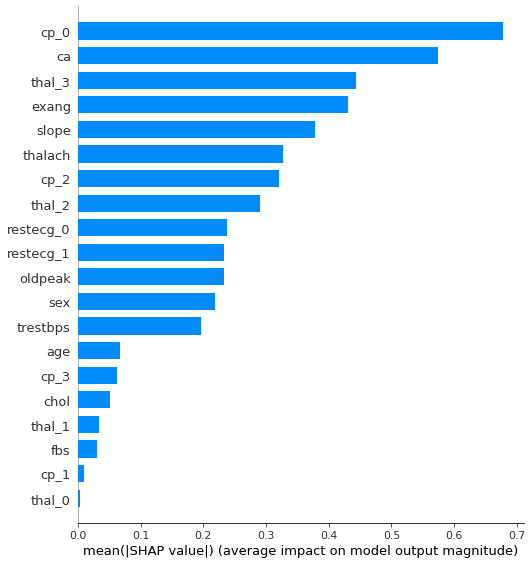

In [167]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

## Write your inferences from the generated plot.

the model is very depend on cp_0 attributes than other attribues the the model is not very depend on attribut fbs, cp_1, and thal_0

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

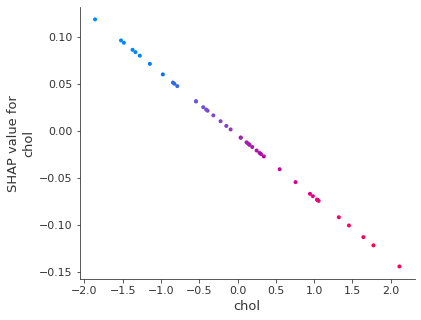

In [163]:
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

## Write your inferences from the generated plot.

depedency between attribute chol and target is linear.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

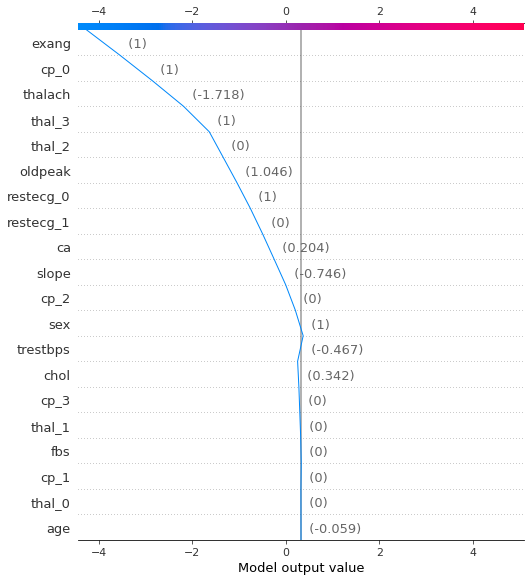

In [171]:
shap.initjs()
shap.decision_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

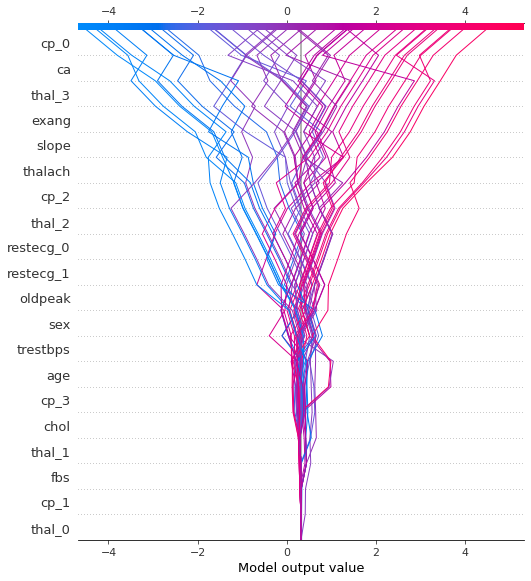

In [169]:
shap.initjs()
shap.decision_plot(explainer.expected_value, shap_values, X_test)

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 